In [1]:
import matplotlib.pyplot as plt
import numpy as np
import windrose
import pandas as pd

In [2]:
tafNew = pd.read_pickle('taf_2018-09_2023-12.pkl.gz')
trollNew = pd.read_pickle('troll_2017-10_2023-12.pkl.gz')
tafOld = pd.read_pickle('tafOld_2007-01_2017-10.pkl.gz')
trollOld = pd.read_pickle('trollOld_2007-01_2018-10.pkl.gz')

Set out of range values to NaN

In [3]:
valid_range = {'rh':[0,100], 'T':[-49.5,15], 'wd':[-1,361], 'ws':[-1,90], 'wg':[-1,110]}

In [4]:
tafNew.describe()

,rh,wd,T,ws,wg
count,2.669698e+06,2.669465e+06,2.602087e+06,2.669463e+06,2.669683e+06
mean,5.667248e+01,1.599731e+02,-1.843021e+01,8.582585e+00,1.315739e+01
std,1.402558e+01,8.167141e+01,8.802842e+00,8.668451e+00,1.241401e+01
min,-2.130000e+01,-2.350000e+01,-4.780000e+01,-2.400000e+01,-2.250000e+01
25%,4.700000e+01,8.000000e+01,-2.520000e+01,3.100000e+00,5.800000e+00
50%,5.600000e+01,1.810000e+02,-1.790000e+01,5.800000e+00,8.800000e+00
75%,6.700000e+01,1.960000e+02,-1.100000e+01,1.050000e+01,1.490000e+01
max,3.060000e+02,1.300000e+03,4.000000e+01,5.130000e+02,1.553000e+03


In [5]:
for c in tafNew.columns:
    tafNew.loc[:,c].mask((tafNew.loc[:,c]<valid_range[c][0]) | (tafNew.loc[:,c]>valid_range[c][1]), inplace=True)
tafNew.describe()

,rh,wd,T,ws,wg
count,2.669686e+06,2.669461e+06,2.602086e+06,2.669408e+06,2.669636e+06
mean,5.667235e+01,1.599724e+02,-1.843023e+01,8.579194e+00,1.315308e+01
std,1.402345e+01,8.166701e+01,8.802769e+00,8.629554e+00,1.232494e+01
min,0.000000e+00,0.000000e+00,-4.780000e+01,0.000000e+00,0.000000e+00
25%,4.700000e+01,8.000000e+01,-2.520000e+01,3.100000e+00,5.800000e+00
50%,5.600000e+01,1.810000e+02,-1.790000e+01,5.800000e+00,8.800000e+00
75%,6.700000e+01,1.960000e+02,-1.100000e+01,1.050000e+01,1.490000e+01
max,9.500000e+01,3.600000e+02,7.200000e+00,6.580000e+01,9.960000e+01


In [6]:
tafOld.describe()

,T,wd,ws,wg
count,4.749216e+06,4.327710e+06,4.328745e+06,4.026877e+06
mean,-1.865877e+01,1.617277e+02,5.412259e+00,1.230258e+01
std,8.605488e+00,7.868987e+01,4.799287e+00,1.112589e+01
min,-4.489000e+01,0.000000e+00,3.000000e-02,1.200000e-01
25%,-2.534000e+01,7.935000e+01,2.330000e+00,3.800000e+00
50%,-1.807000e+01,1.825700e+02,3.770000e+00,7.500000e+00
75%,-1.160000e+01,2.059100e+02,6.580000e+00,1.879000e+01
max,6.460000e+00,3.600000e+02,5.859000e+01,6.000000e+01


In [7]:
for c in tafOld.columns:
    tafOld.loc[:,c].mask((tafOld.loc[:,c]<valid_range[c][0]) | (tafOld.loc[:,c]>valid_range[c][1]), inplace=True)
tafOld.describe()

,T,wd,ws,wg
count,4.749216e+06,4.327710e+06,4.328745e+06,4.026877e+06
mean,-1.865877e+01,1.617277e+02,5.412259e+00,1.230258e+01
std,8.605488e+00,7.868987e+01,4.799287e+00,1.112589e+01
min,-4.489000e+01,0.000000e+00,3.000000e-02,1.200000e-01
25%,-2.534000e+01,7.935000e+01,2.330000e+00,3.800000e+00
50%,-1.807000e+01,1.825700e+02,3.770000e+00,7.500000e+00
75%,-1.160000e+01,2.059100e+02,6.580000e+00,1.879000e+01
max,6.460000e+00,3.600000e+02,5.859000e+01,6.000000e+01


In [8]:
trollNew.describe()

,rh,T,ws,wg,wd
count,3.158401e+06,3.157371e+06,3.152680e+06,3.158362e+06,3.152680e+06
mean,4.385211e+01,-1.538480e+01,3.831009e+00,7.440854e+00,1.195586e+02
std,1.586604e+01,6.691548e+00,4.849756e+00,8.164041e+00,1.056453e+02
min,4.000000e+00,-5.960000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.200000e+01,-2.030000e+01,1.000000e+00,2.700000e+00,3.100000e+01
50%,4.200000e+01,-1.500000e+01,2.000000e+00,4.100000e+00,7.300000e+01
75%,5.500000e+01,-1.000000e+01,4.400000e+00,8.300000e+00,1.930000e+02
max,9.500000e+01,5.000000e+00,3.710000e+01,5.720000e+01,3.600000e+02


In [9]:
for c in trollNew.columns:
    trollNew.loc[:,c].mask((trollNew.loc[:,c]<valid_range[c][0]) | (trollNew.loc[:,c]>valid_range[c][1]), inplace=True)
trollNew.describe()

,rh,T,ws,wg,wd
count,3.158401e+06,3.157259e+06,3.152680e+06,3.158362e+06,3.152680e+06
mean,4.385211e+01,-1.538338e+01,3.831009e+00,7.440854e+00,1.195586e+02
std,1.586604e+01,6.687360e+00,4.849756e+00,8.164041e+00,1.056453e+02
min,4.000000e+00,-4.940000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.200000e+01,-2.030000e+01,1.000000e+00,2.700000e+00,3.100000e+01
50%,4.200000e+01,-1.500000e+01,2.000000e+00,4.100000e+00,7.300000e+01
75%,5.500000e+01,-1.000000e+01,4.400000e+00,8.300000e+00,1.930000e+02
max,9.500000e+01,5.000000e+00,3.710000e+01,5.720000e+01,3.600000e+02


In [10]:
trollOld.describe()

,rh,T,ws,wg,wd
count,5.526478e+06,5.556960e+06,5.336672e+06,5.353428e+06,5.336641e+06
mean,4.993111e+01,-1.758908e+01,4.139468e+00,5.119369e+00,1.484526e+02
std,1.627022e+01,8.773904e+00,5.071699e+00,6.405133e+00,9.377472e+01
min,6.000000e+00,-6.830000e+01,0.000000e+00,0.000000e+00,-5.000000e-01
25%,3.800000e+01,-2.440000e+01,1.250000e+00,1.500000e+00,4.820000e+01
50%,4.900000e+01,-1.690000e+01,1.880000e+00,2.340000e+00,1.935000e+02
75%,6.200000e+01,-1.020000e+01,4.710000e+00,5.740000e+00,2.270000e+02
max,1.000000e+02,1.270000e+01,3.671000e+01,5.922000e+01,3.600000e+02


In [11]:
for c in trollOld.columns:
    trollOld.loc[:,c].mask((trollOld.loc[:,c]<valid_range[c][0]) | (trollOld.loc[:,c]>valid_range[c][1]), inplace=True)
trollOld.loc[:,'wd'].mask(trollOld.loc[:,'wd']<0, 0, inplace=True)
trollOld.describe()

,rh,T,ws,wg,wd
count,5.526478e+06,5.556955e+06,5.336672e+06,5.353428e+06,5.336641e+06
mean,4.993111e+01,-1.758904e+01,4.139468e+00,5.119369e+00,1.484526e+02
std,1.627022e+01,8.773808e+00,5.071699e+00,6.405133e+00,9.377462e+01
min,6.000000e+00,-4.910000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.800000e+01,-2.440000e+01,1.250000e+00,1.500000e+00,4.820000e+01
50%,4.900000e+01,-1.690000e+01,1.880000e+00,2.340000e+00,1.935000e+02
75%,6.200000e+01,-1.020000e+01,4.710000e+00,5.740000e+00,2.270000e+02
max,1.000000e+02,1.270000e+01,3.671000e+01,5.922000e+01,3.600000e+02


Look at PoR for all 4 datasets. Problems with T and wg from tafOld.<br>
Spike in trollNew T at end of 2020.<br>
Possible spikes in tafNew T and RH in mid 2020.

array([[<Axes: xlabel='measured'>],
       [<Axes: xlabel='measured'>],
       [<Axes: xlabel='measured'>],
       [<Axes: xlabel='measured'>]], dtype=object)

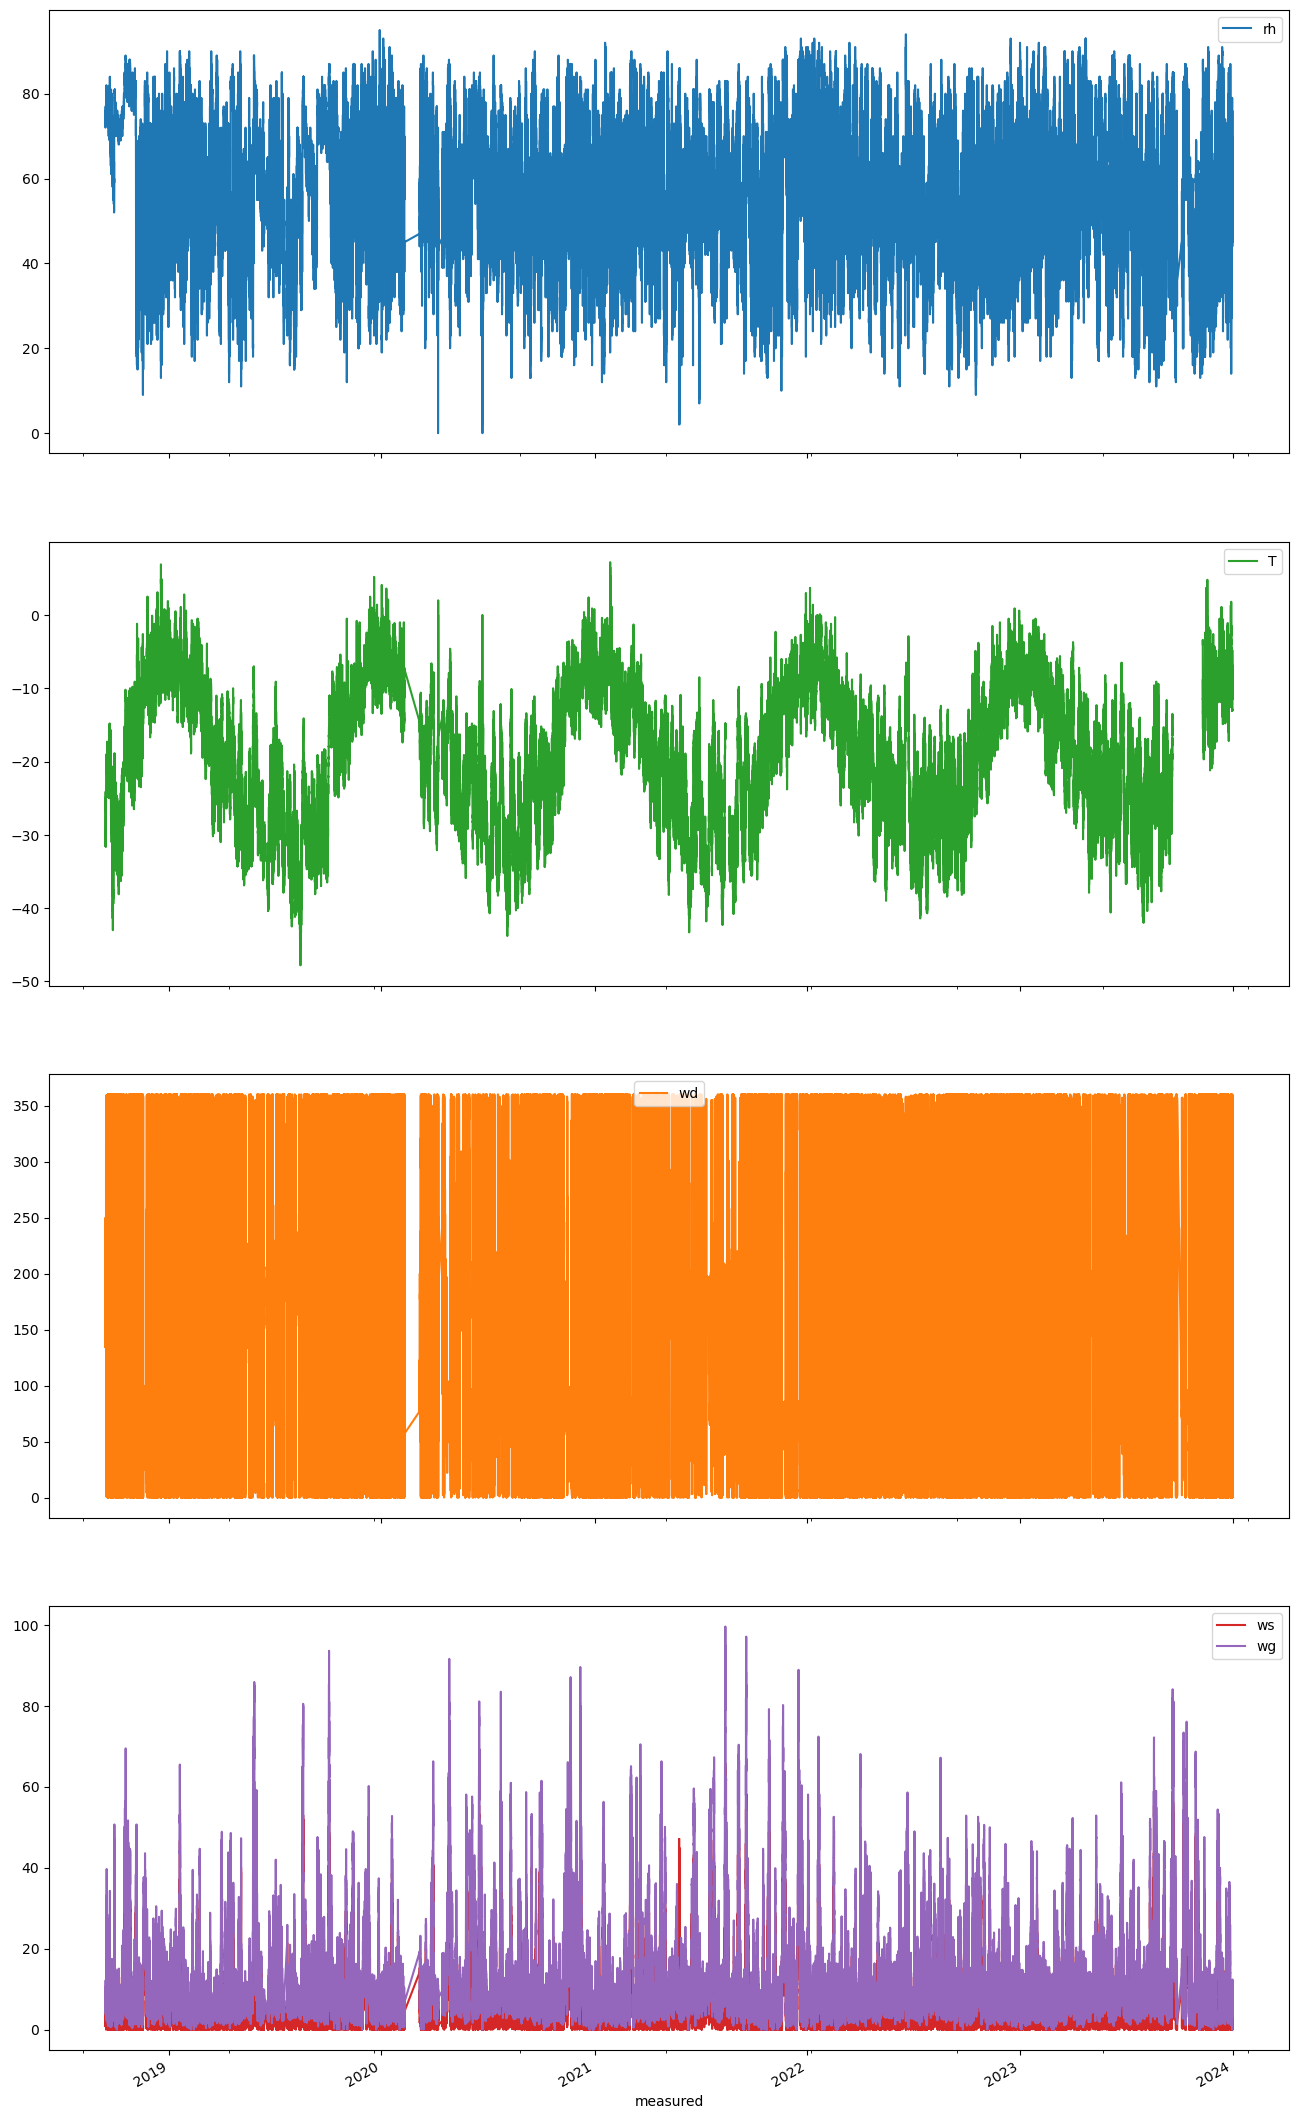

In [12]:
tafNew.plot(figsize=(16,30), subplots=[['rh'], ['T'], ['wd'], ('ws', 'wg')], layout=(4,1), x_compat=True, sharex=True)

array([[<Axes: xlabel='measured'>],
       [<Axes: xlabel='measured'>],
       [<Axes: xlabel='measured'>],
       [<Axes: xlabel='measured'>]], dtype=object)

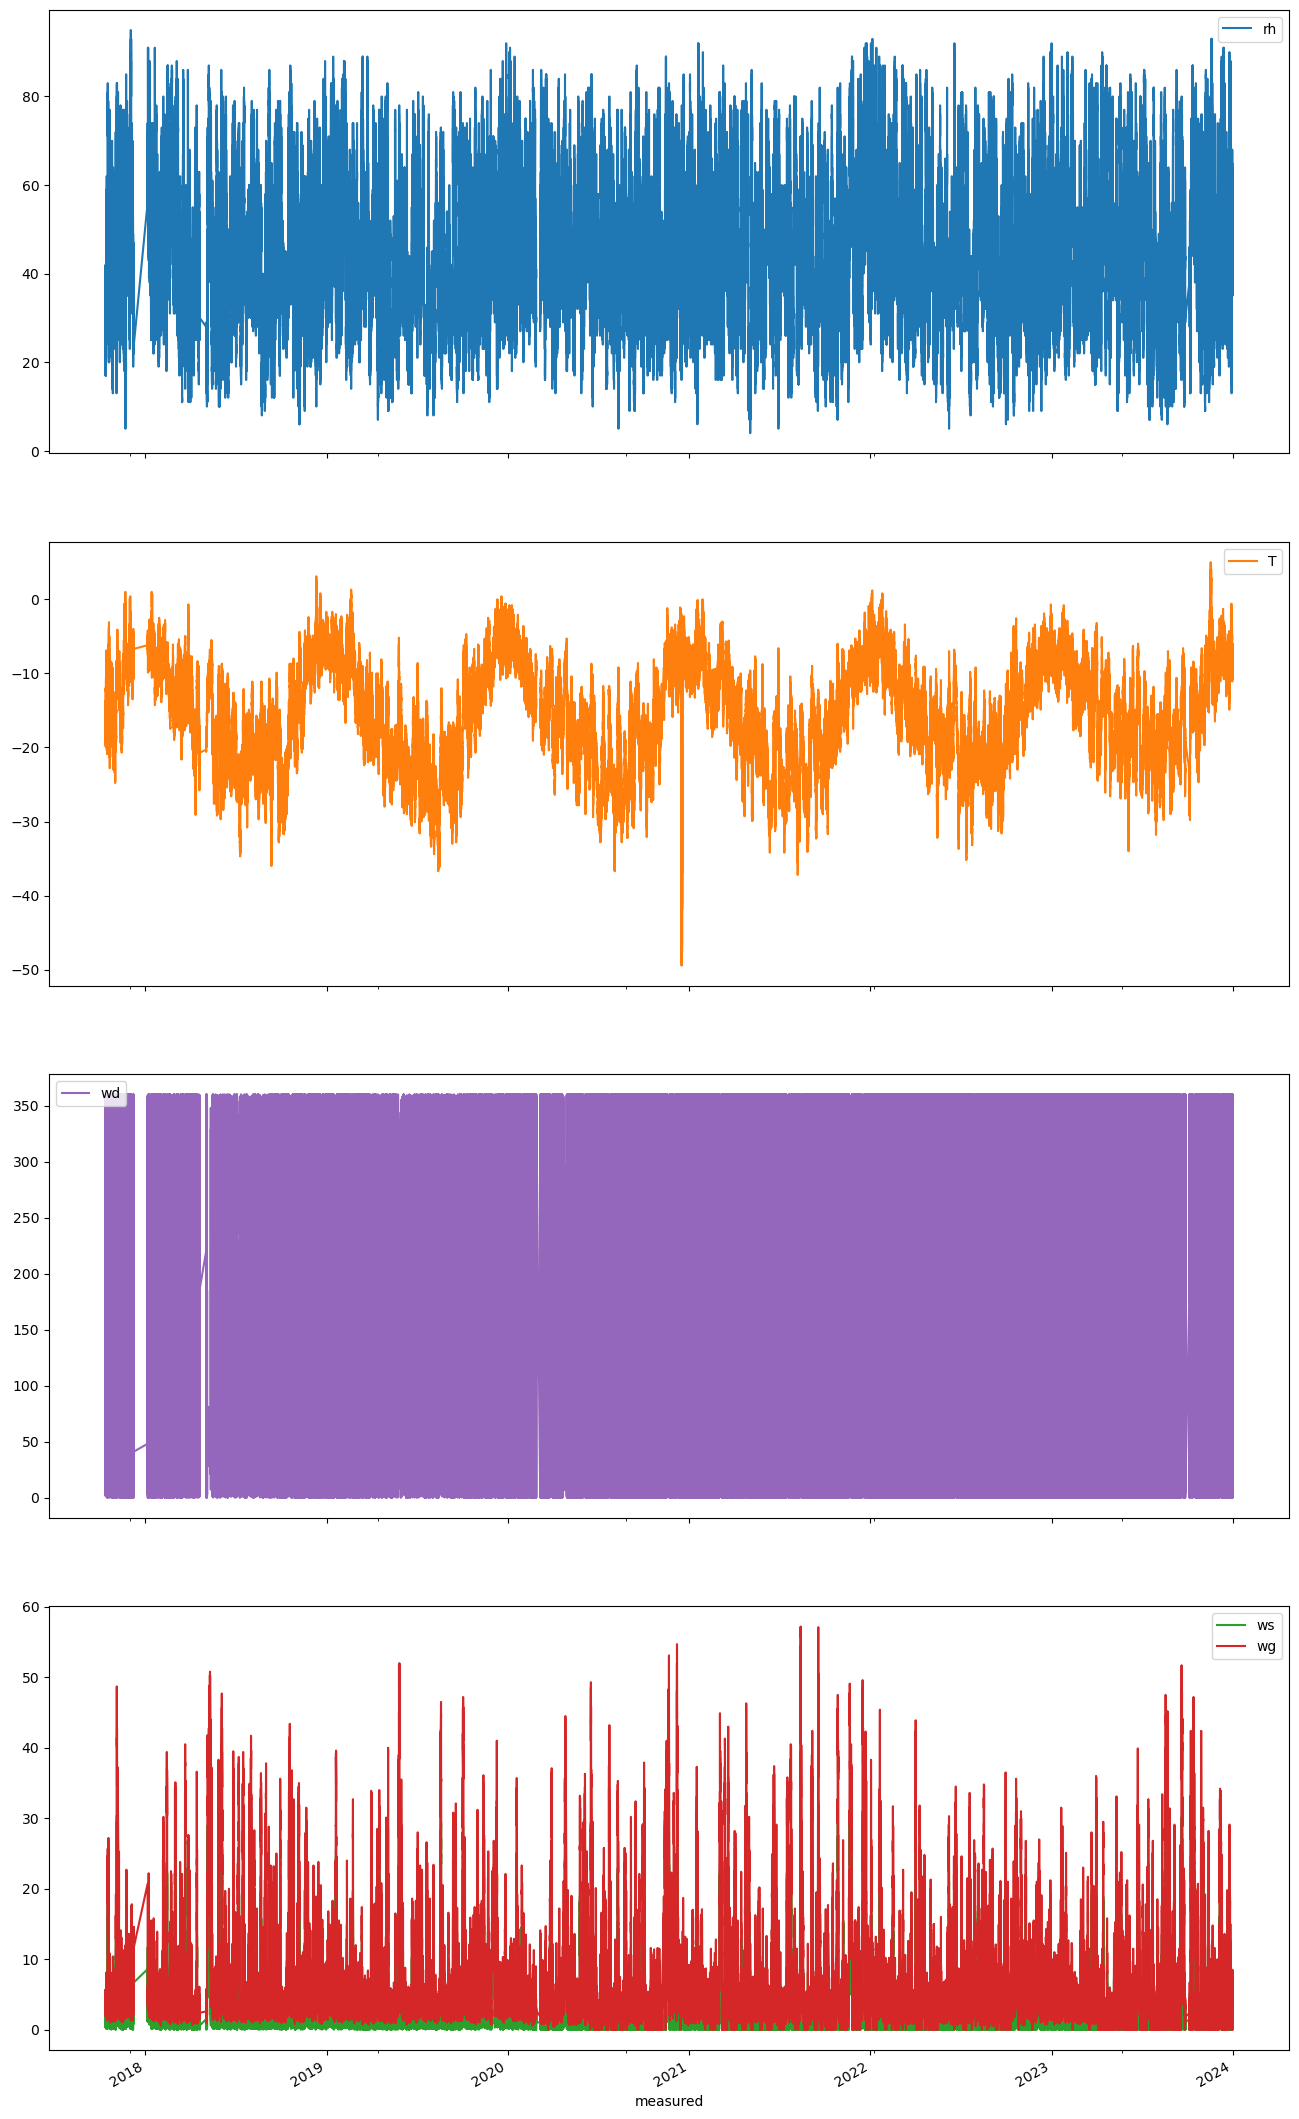

In [13]:
trollNew.plot(figsize=(16,30), subplots=[['rh'], ['T'], ['wd'], ('ws', 'wg')], layout=(4,1), x_compat=True, sharex=True)

array([[<Axes: xlabel='measured'>],
       [<Axes: xlabel='measured'>],
       [<Axes: xlabel='measured'>]], dtype=object)

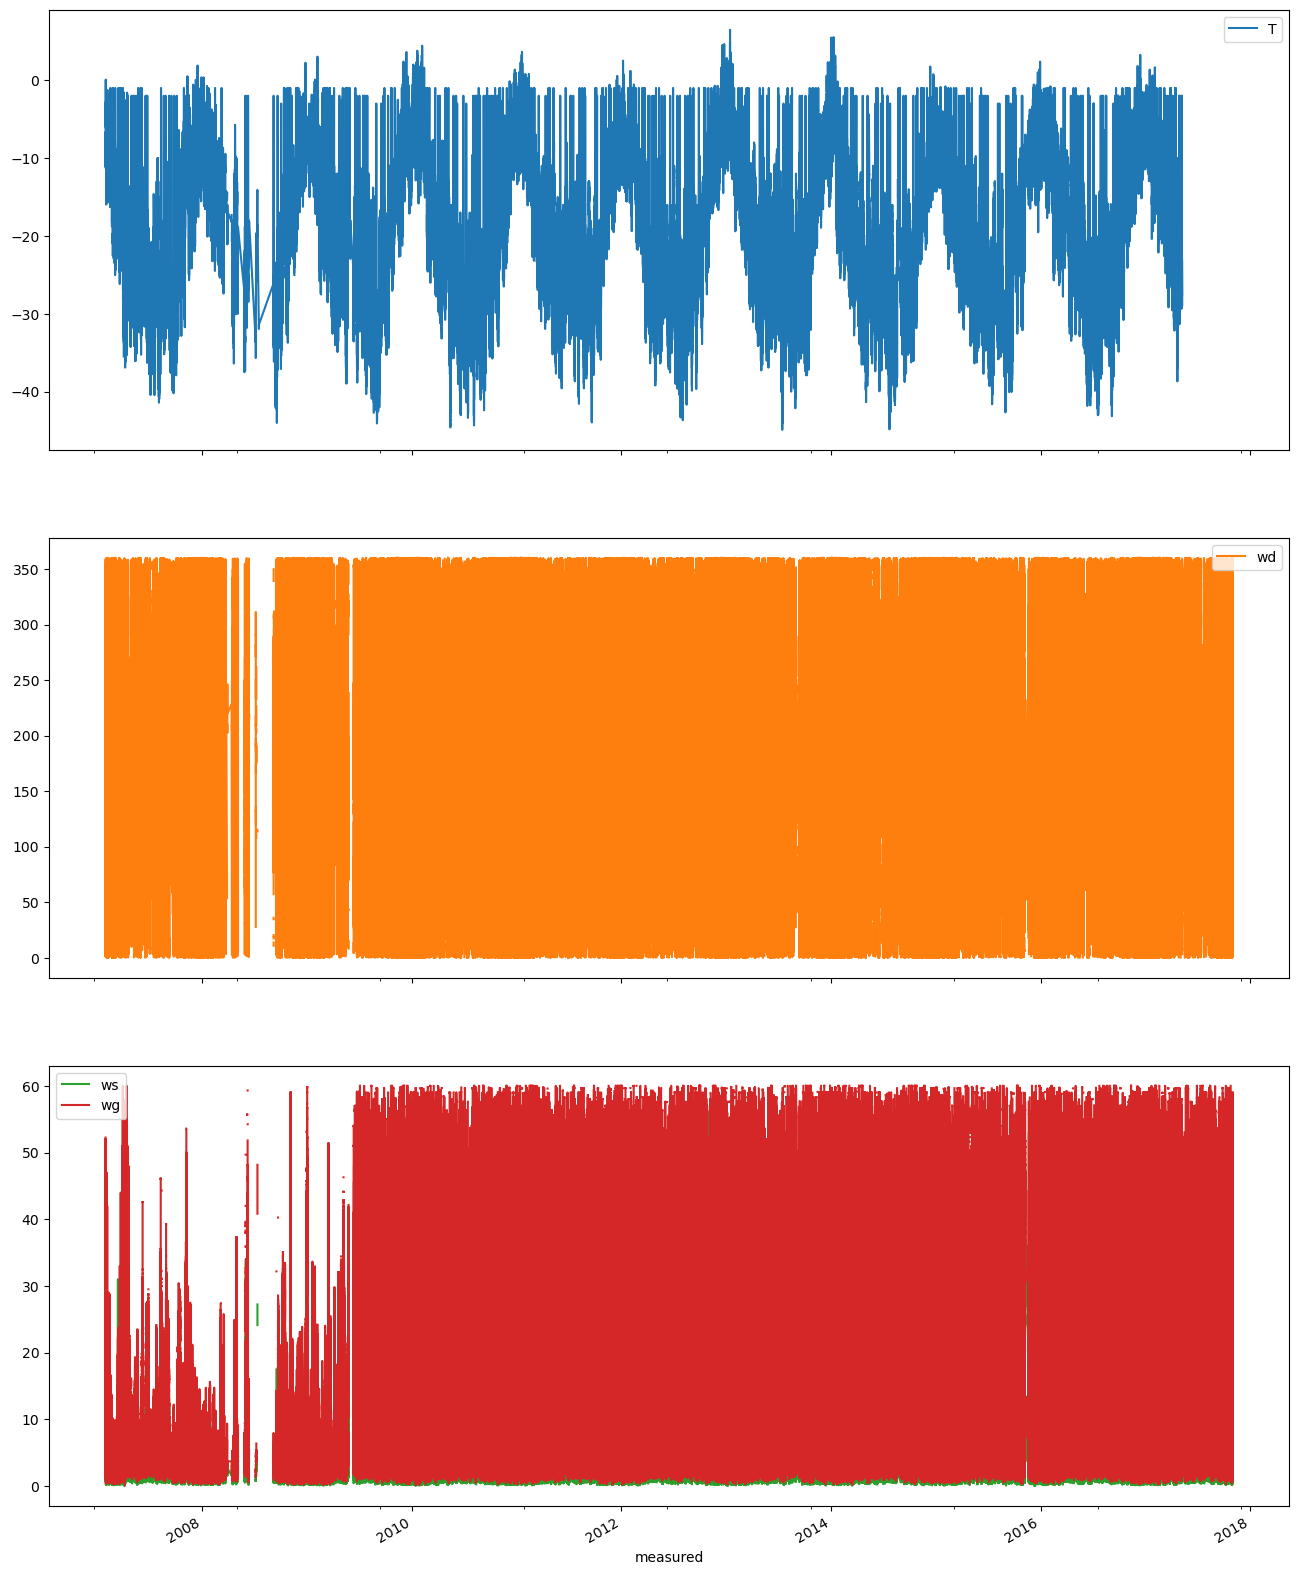

In [14]:
tafOld.plot(figsize=(16,22), subplots=[['T'], ['wd'], ('ws', 'wg')], layout=(3,1), x_compat=True, sharex=True)

<Axes: xlabel='measured'>

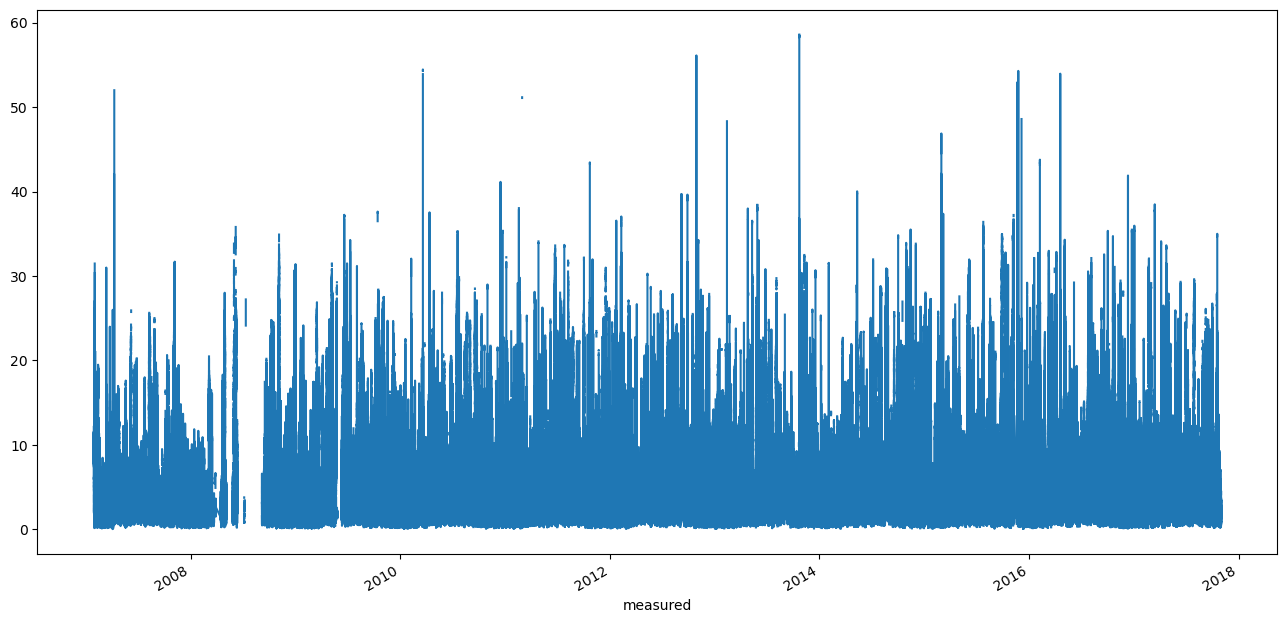

In [15]:
tafOld.ws.plot(figsize=(16,8), x_compat=True)

array([[<Axes: xlabel='measured'>],
       [<Axes: xlabel='measured'>],
       [<Axes: xlabel='measured'>],
       [<Axes: xlabel='measured'>]], dtype=object)

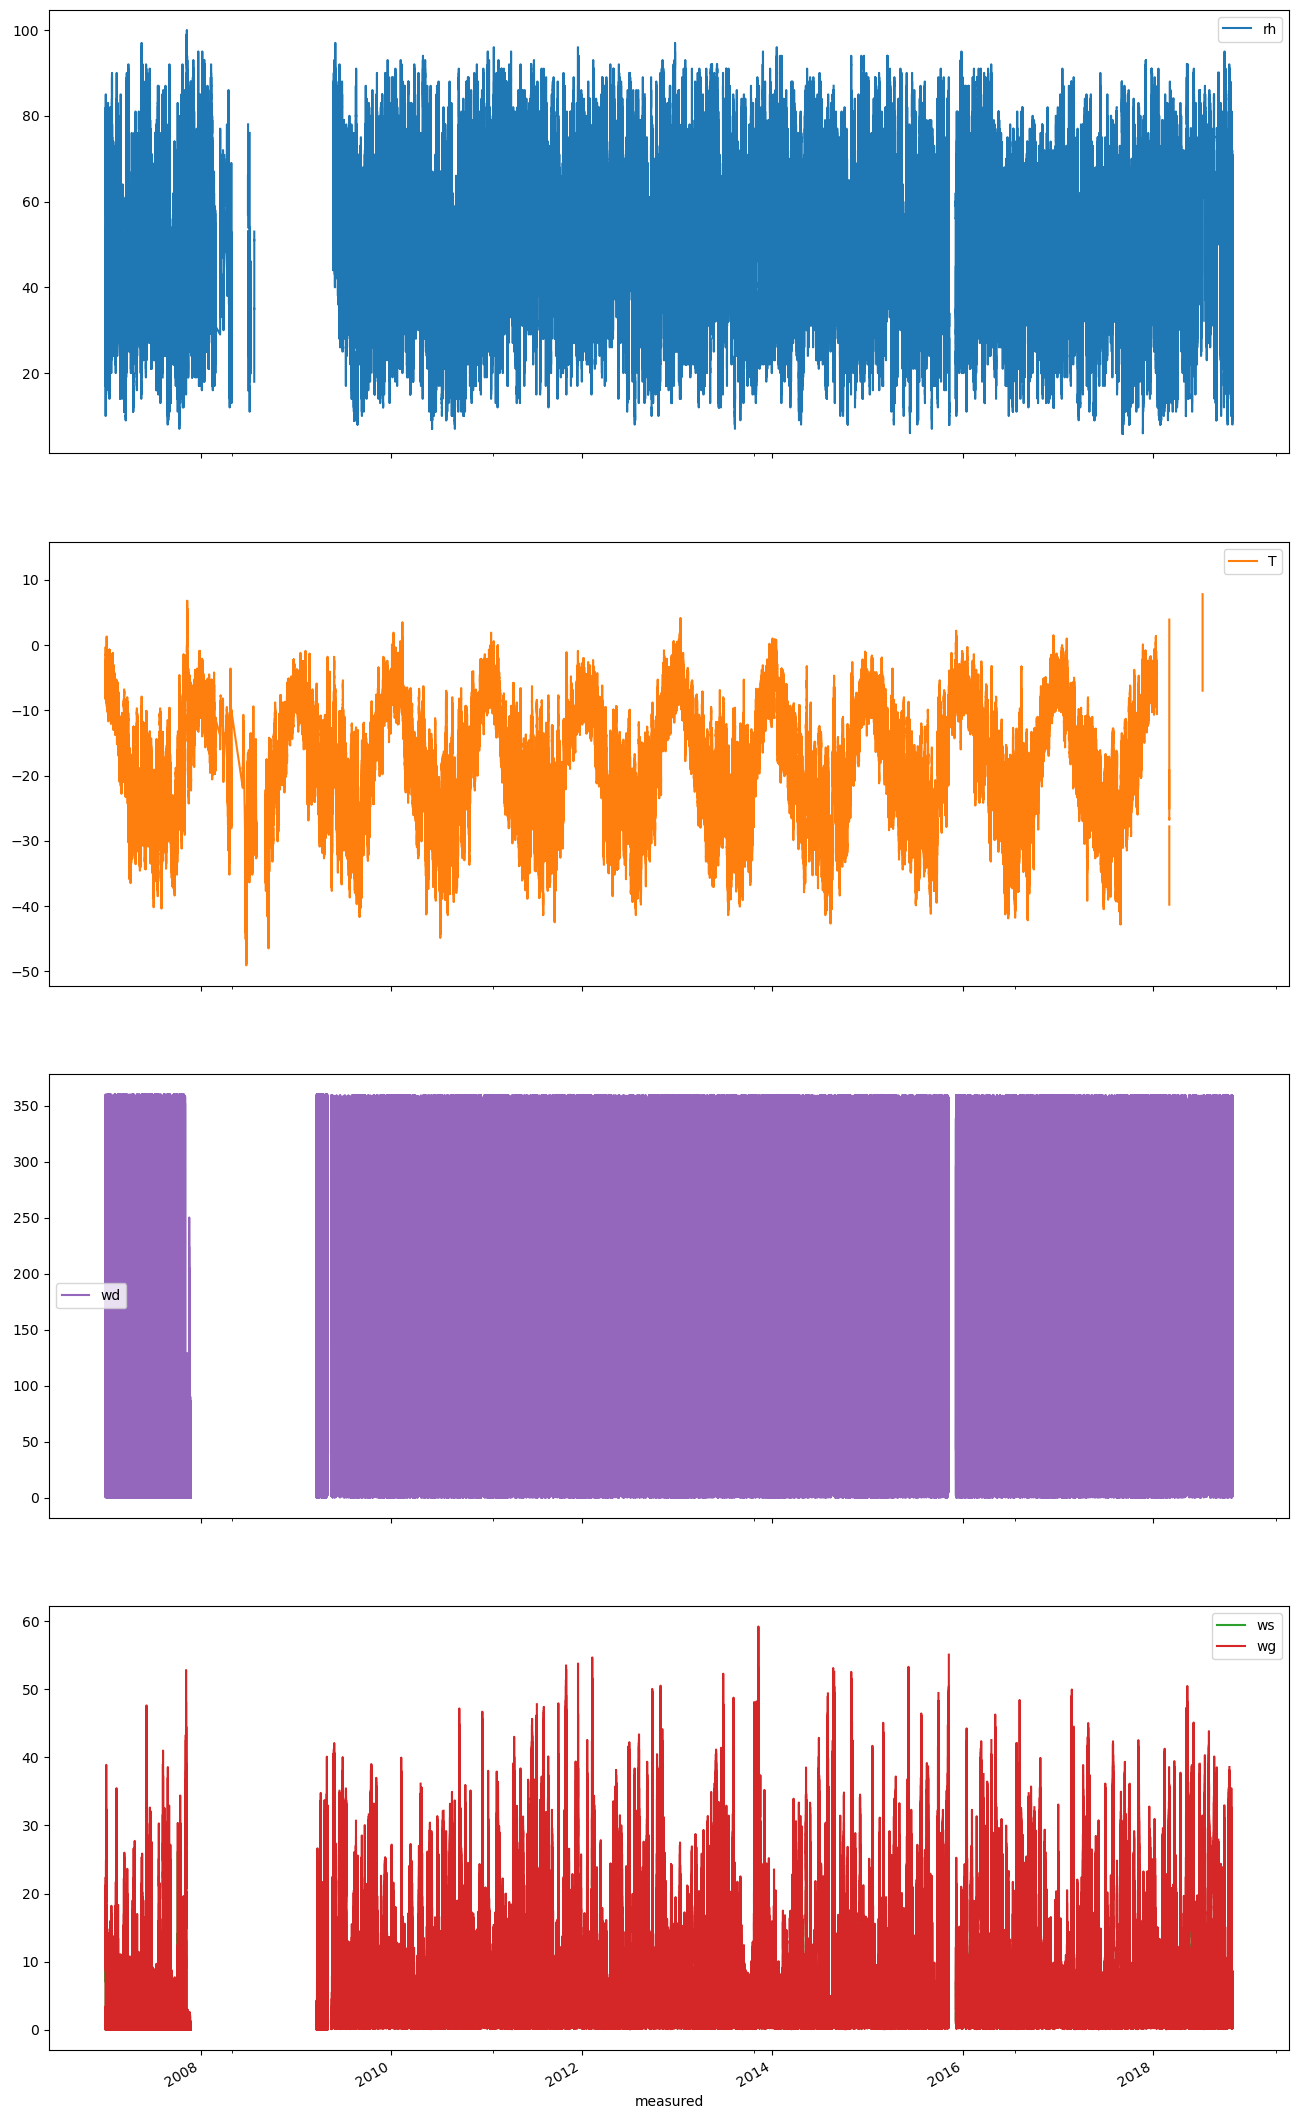

In [16]:
trollOld.plot(figsize=(16,30), subplots=[['rh'], ['T'], ['wd'], ('ws', 'wg')], layout=(4,1), x_compat=True, sharex=True)

Look at 2020 spikes

array([[<Axes: xlabel='measured'>],
       [<Axes: xlabel='measured'>],
       [<Axes: xlabel='measured'>],
       [<Axes: xlabel='measured'>]], dtype=object)

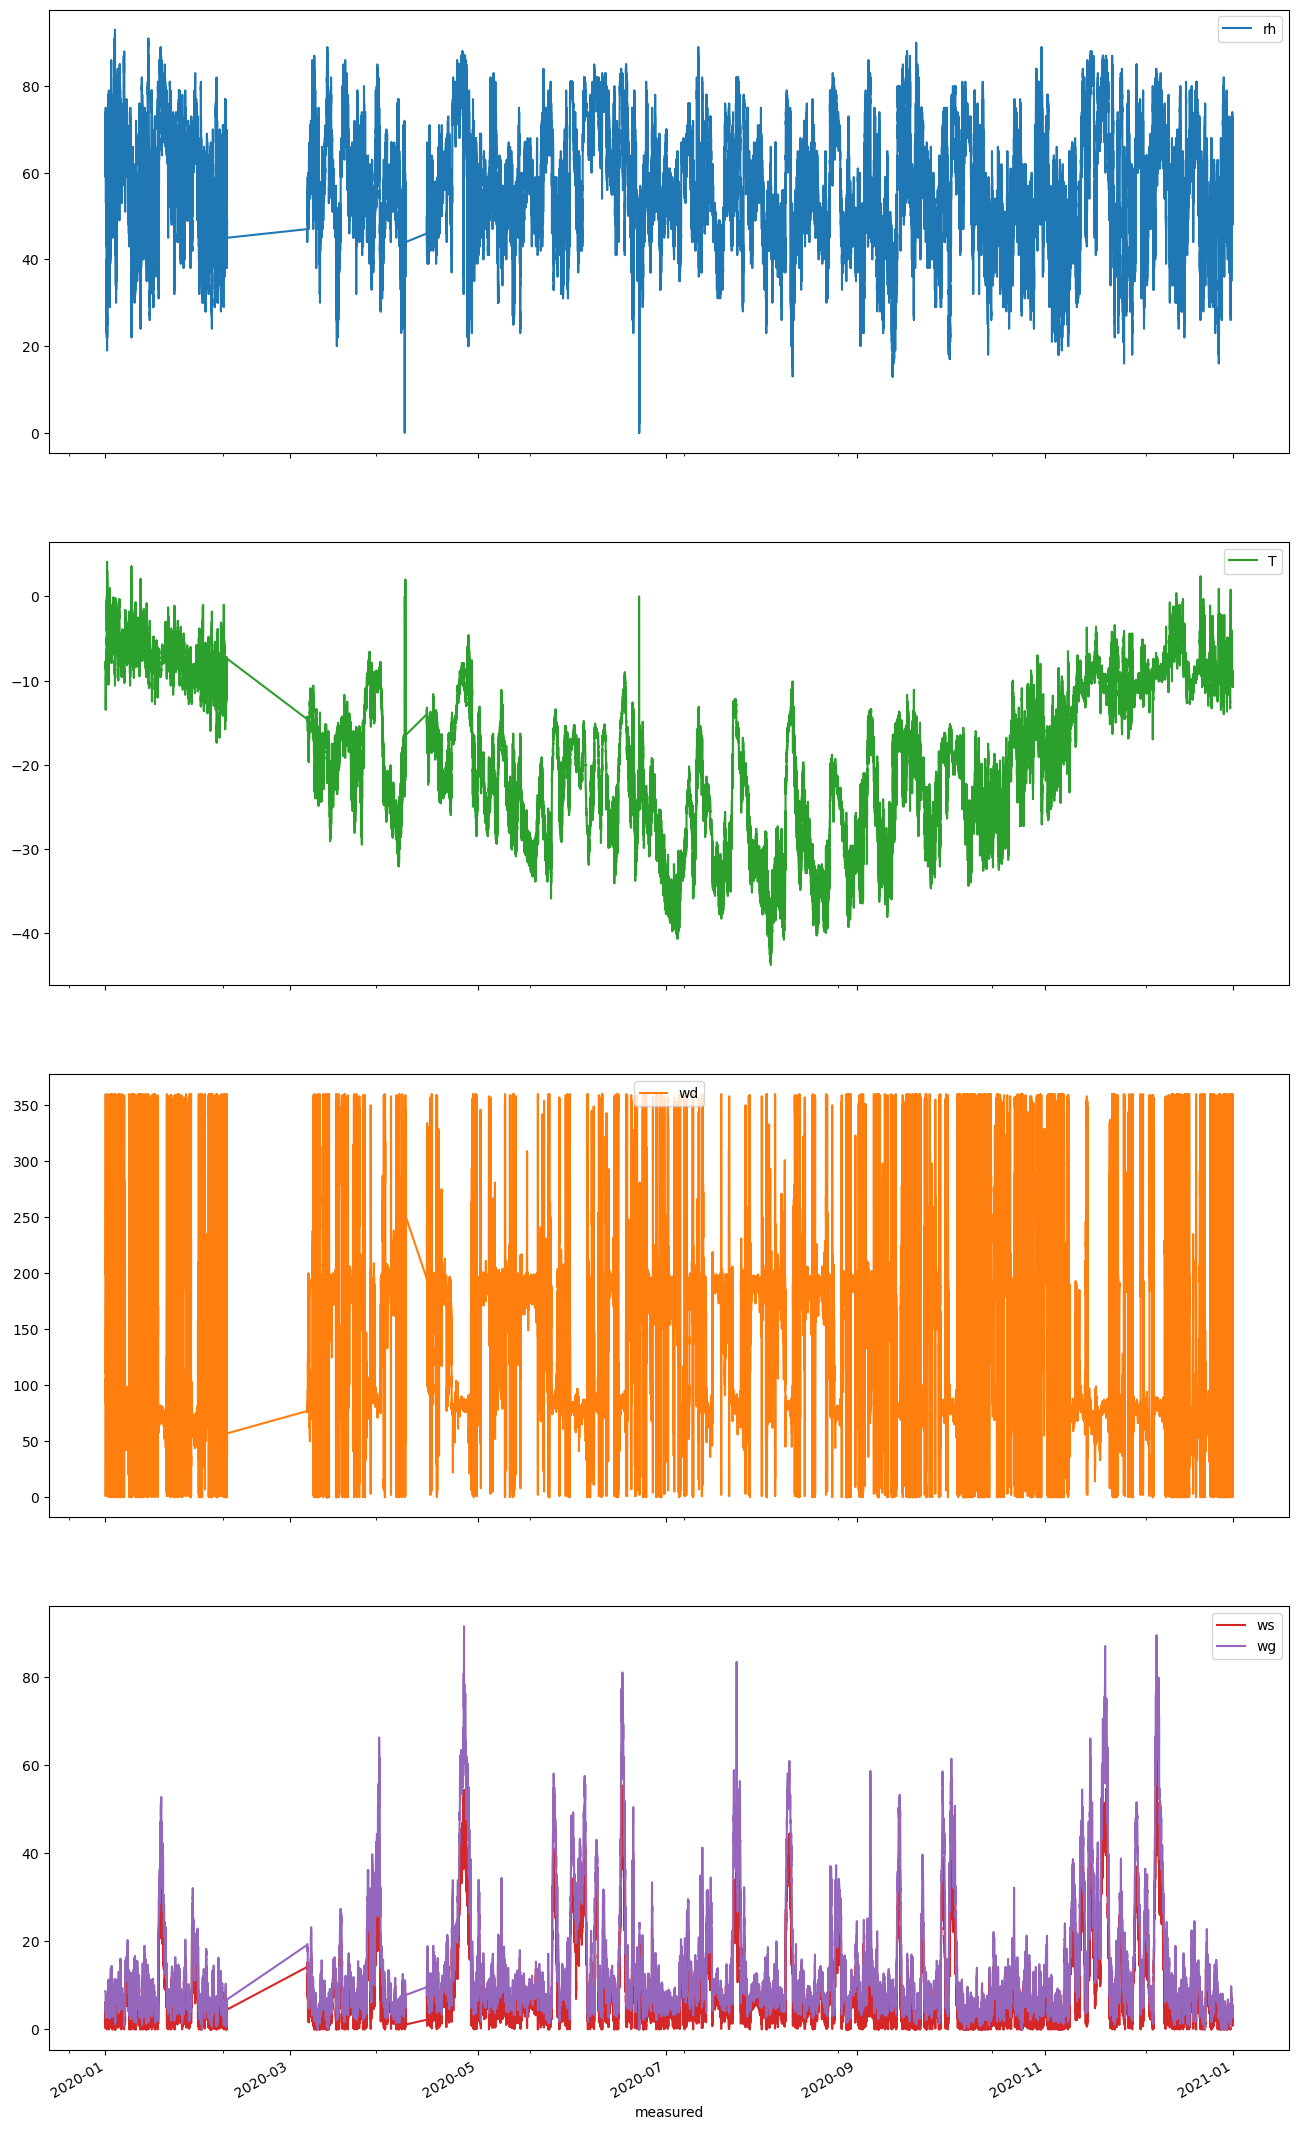

In [17]:
tafNew.loc['2020'].plot(figsize=(16,30), subplots=[['rh'], ['T'], ['wd'], ('ws', 'wg')], layout=(4,1), x_compat=True, sharex=True)

array([[<Axes: xlabel='measured'>],
       [<Axes: xlabel='measured'>],
       [<Axes: xlabel='measured'>],
       [<Axes: xlabel='measured'>]], dtype=object)

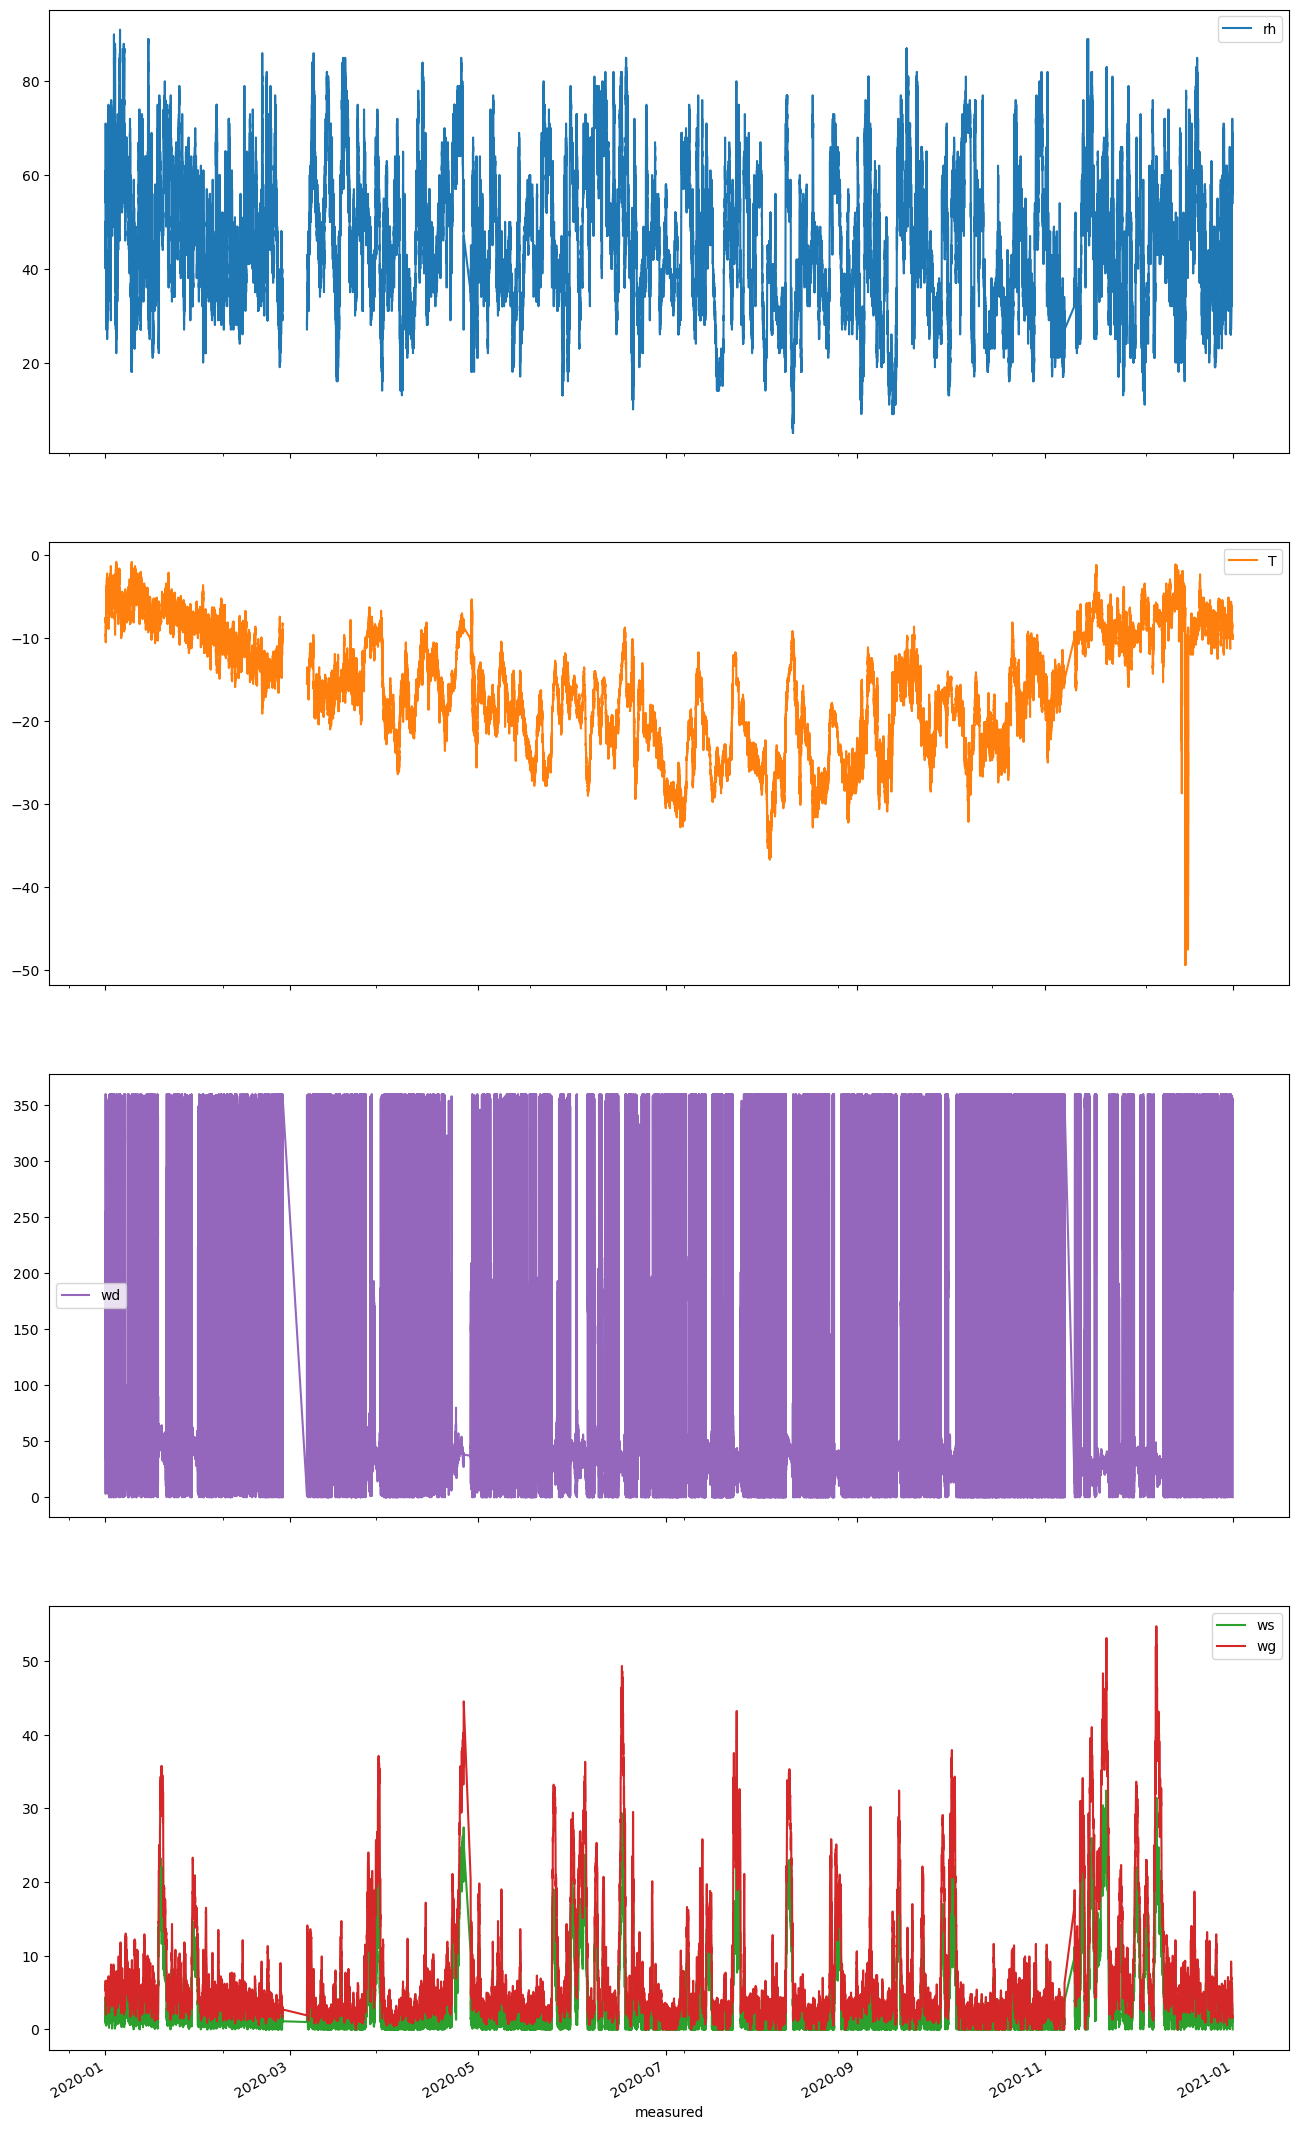

In [18]:
trollNew.loc['2020'].plot(figsize=(16,30), subplots=[['rh'], ['T'], ['wd'], ('ws', 'wg')], layout=(4,1), x_compat=True, sharex=True)

array([[<Axes: xlabel='measured'>],
       [<Axes: xlabel='measured'>],
       [<Axes: xlabel='measured'>],
       [<Axes: xlabel='measured'>]], dtype=object)

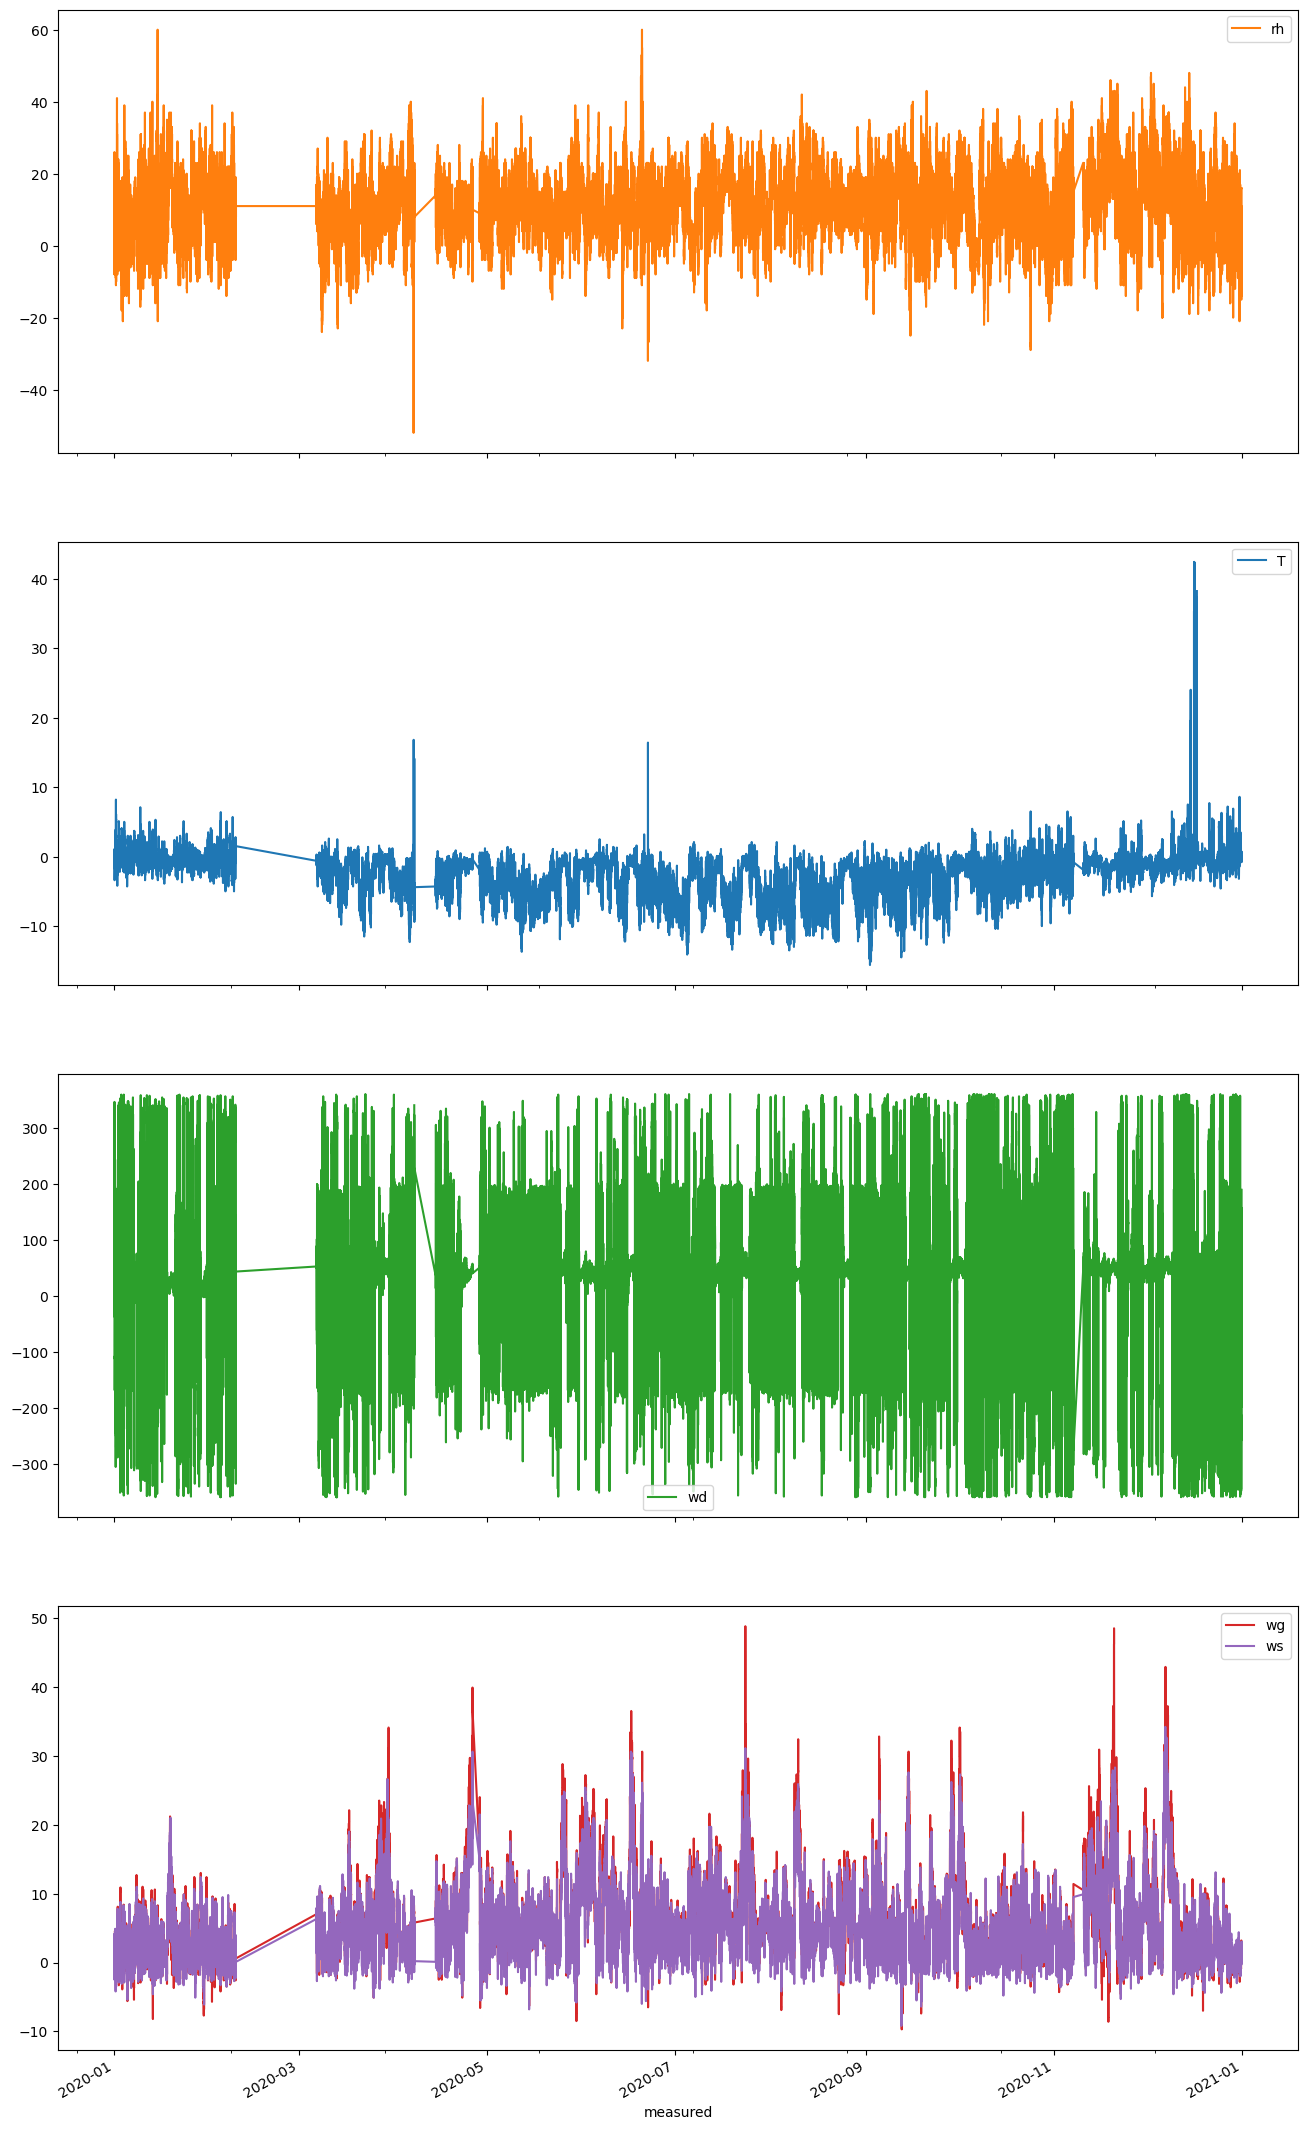

In [19]:
dT = pd.DataFrame(index=tafNew.index.intersection(trollNew.index), columns=tafNew.columns, data=np.nan)
dT = tafNew.loc[dT.index] - trollNew.loc[dT.index]
dT.loc['2020'].plot(figsize=(16,30), subplots=[['rh'], ['T'], ['wd'], ('ws', 'wg')], layout=(4,1), x_compat=True, sharex=True)

Delete TAF data during the first 2 spikes, Troll data during the last

In [20]:
indx = dT.loc['2020-01':'2020-06'].query('T>10')
indx

,T,rh,wd,wg,ws
measured,,,,,
2020-04-07 04:20:00+00:00,16.8,11.0,-25.0,7.2,2.2
2020-04-07 09:24:00+00:00,14.1,NaN,-20.0,NaN,NaN
2020-06-22 06:04:00+00:00,16.4,13.0,29.0,NaN,5.7


In [21]:
tafNew.loc[indx.index] = np.nan
indx = dT.loc['2020-07':'2020-12'].query('T>10')
indx

,T,rh,wd,wg,ws
measured,,,,,
2020-12-09 16:12:00+00:00,23.8,12.0,-253.0,17.7,12.6
2020-12-15 08:37:00+00:00,10.8,-1.0,12.0,2.2,2.5
2020-12-15 08:42:00+00:00,10.1,-1.0,14.0,2.5,2.6
2020-12-15 08:43:00+00:00,10.1,2.0,13.0,2.5,2.6
2020-12-15 10:59:00+00:00,12.4,18.0,334.0,2.6,2.7
...,...,...,...,...,...
2020-12-17 11:49:00+00:00,18.3,8.0,-318.0,2.1,1.0
2020-12-17 11:53:00+00:00,23.3,6.0,-319.0,1.4,0.4
2020-12-17 11:55:00+00:00,10.8,4.0,-316.0,1.5,0.3


In [22]:
trollNew.loc[indx.index[0]:indx.index[-1]] = np.nan

array([[<Axes: xlabel='measured'>],
       [<Axes: xlabel='measured'>],
       [<Axes: xlabel='measured'>],
       [<Axes: xlabel='measured'>]], dtype=object)

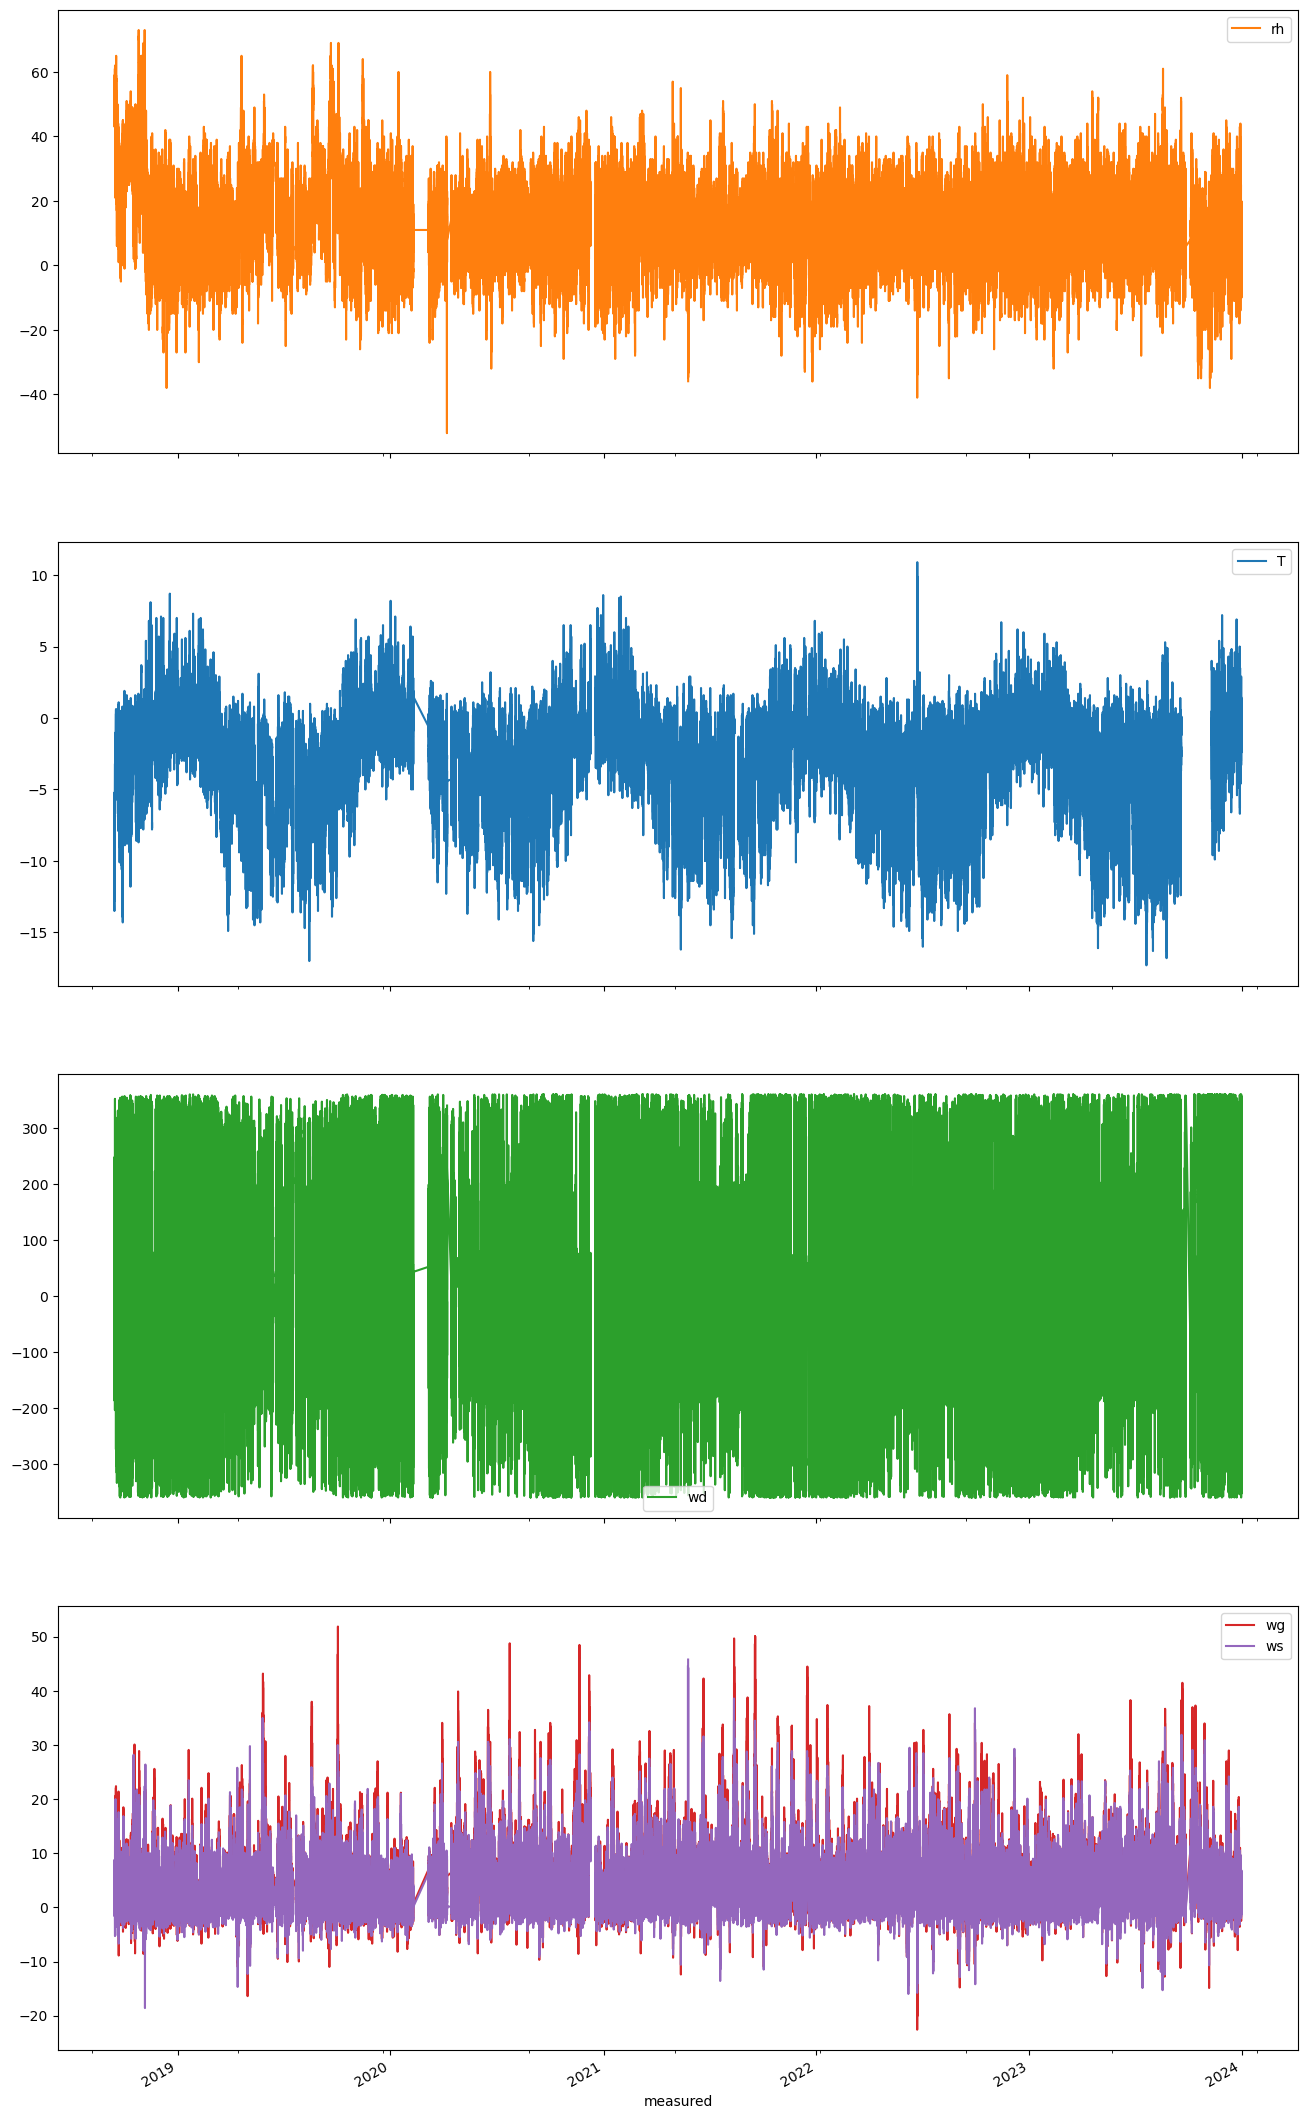

In [23]:
dT = pd.DataFrame(index=tafNew.index.intersection(trollNew.index), columns=tafNew.columns, data=np.nan)
dT = tafNew.loc[dT.index] - trollNew.loc[dT.index]
dT.plot(figsize=(16,30), subplots=[['rh'], ['T'], ['wd'], ('ws', 'wg')], layout=(4,1), x_compat=True, sharex=True)

Remove spike in June 2022 at TAF

<Axes: xlabel='measured'>

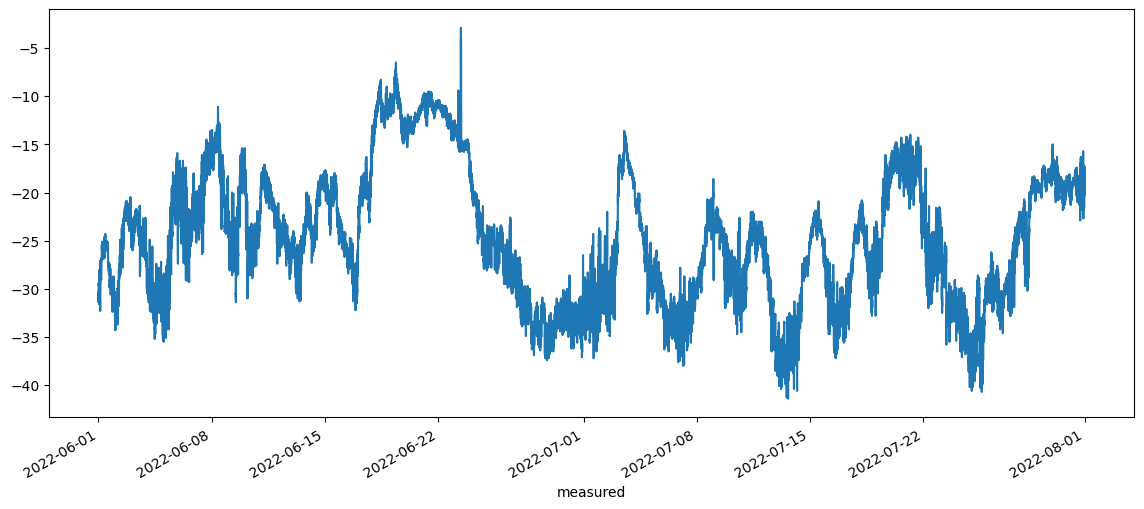

In [24]:
tafNew.loc['2022-06':'2022-07','T'].plot(figsize=(14,6))

<Axes: xlabel='measured'>

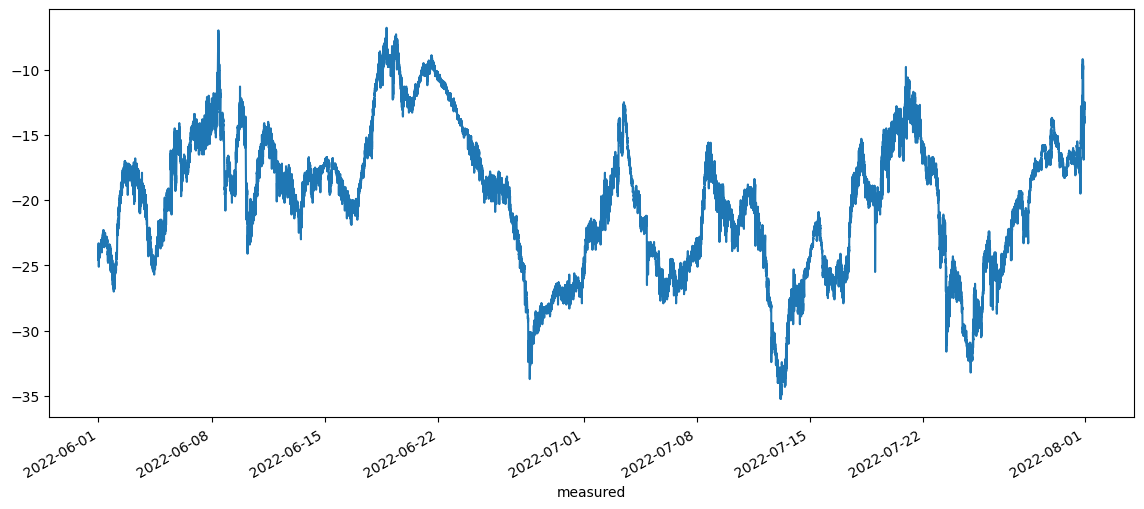

In [25]:
trollNew.loc['2022-06':'2022-07','T'].plot(figsize=(14,6))

In [26]:
dT.query('T>10')

,T,rh,wd,wg,ws
measured,,,,,
2022-06-23 10:00:00+00:00,10.2,-20.0,126.0,-14.3,-12.8
2022-06-23 10:01:00+00:00,10.6,-23.0,121.0,-14.3,-12.9
2022-06-23 10:02:00+00:00,10.8,-24.0,108.0,-14.3,-13.1
2022-06-23 10:03:00+00:00,10.9,-26.0,121.0,-14.3,-13.1
2022-06-23 10:04:00+00:00,10.8,-29.0,129.0,-14.3,-13.0
2022-06-23 10:05:00+00:00,10.5,-30.0,146.0,-18.6,-12.9
2022-06-23 10:06:00+00:00,10.2,-29.0,145.0,-18.9,-13.2


In [27]:
tafNew.loc[dT.query('T>10').index] = np.nan

Save QC'd tafNew (2019-2023), trollNew (2018-2023) and trollOld (2010-2017); skip tafOld

In [28]:
tafNew.loc['2019':'2023'].to_pickle('taf_2019-2023_QC.pkl.gz')
trollNew.loc['2018':'2023'].to_pickle('troll_2018-2023_QC.pkl.gz')
trollOld.loc['2010':'2017'].to_pickle('trollOld_2010-2017_QC.pkl.gz')